<a href="https://colab.research.google.com/github/analyst-rhie/self-taught_machine_learning_code/blob/main/8%EC%9E%A5.%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
                              keras.datasets.fashion_mnist.load_data()

In [13]:
train_scaled = train_input.reshape(-1, 28,28,1) / 255.0

In [14]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, random_state = 42, test_size = 0.2)

In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size= 3, activation='relu', padding='same', input_shape=(28,28,1)))

In [16]:
model.add(keras.layers.MaxPooling2D(2))

In [17]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation = 'relu', padding = 'same'))

In [18]:
model.add(keras.layers.MaxPooling2D(2))

In [19]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)              

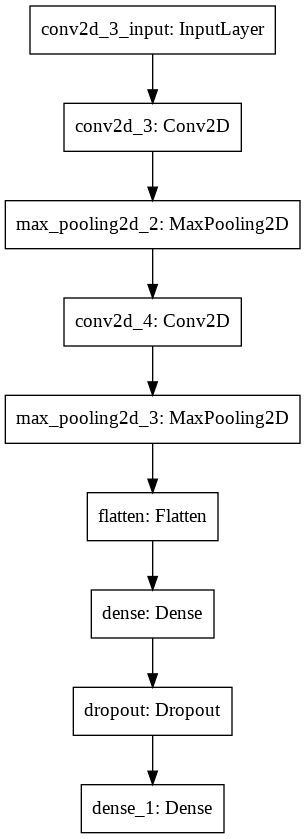

In [21]:
keras.utils.plot_model(model)

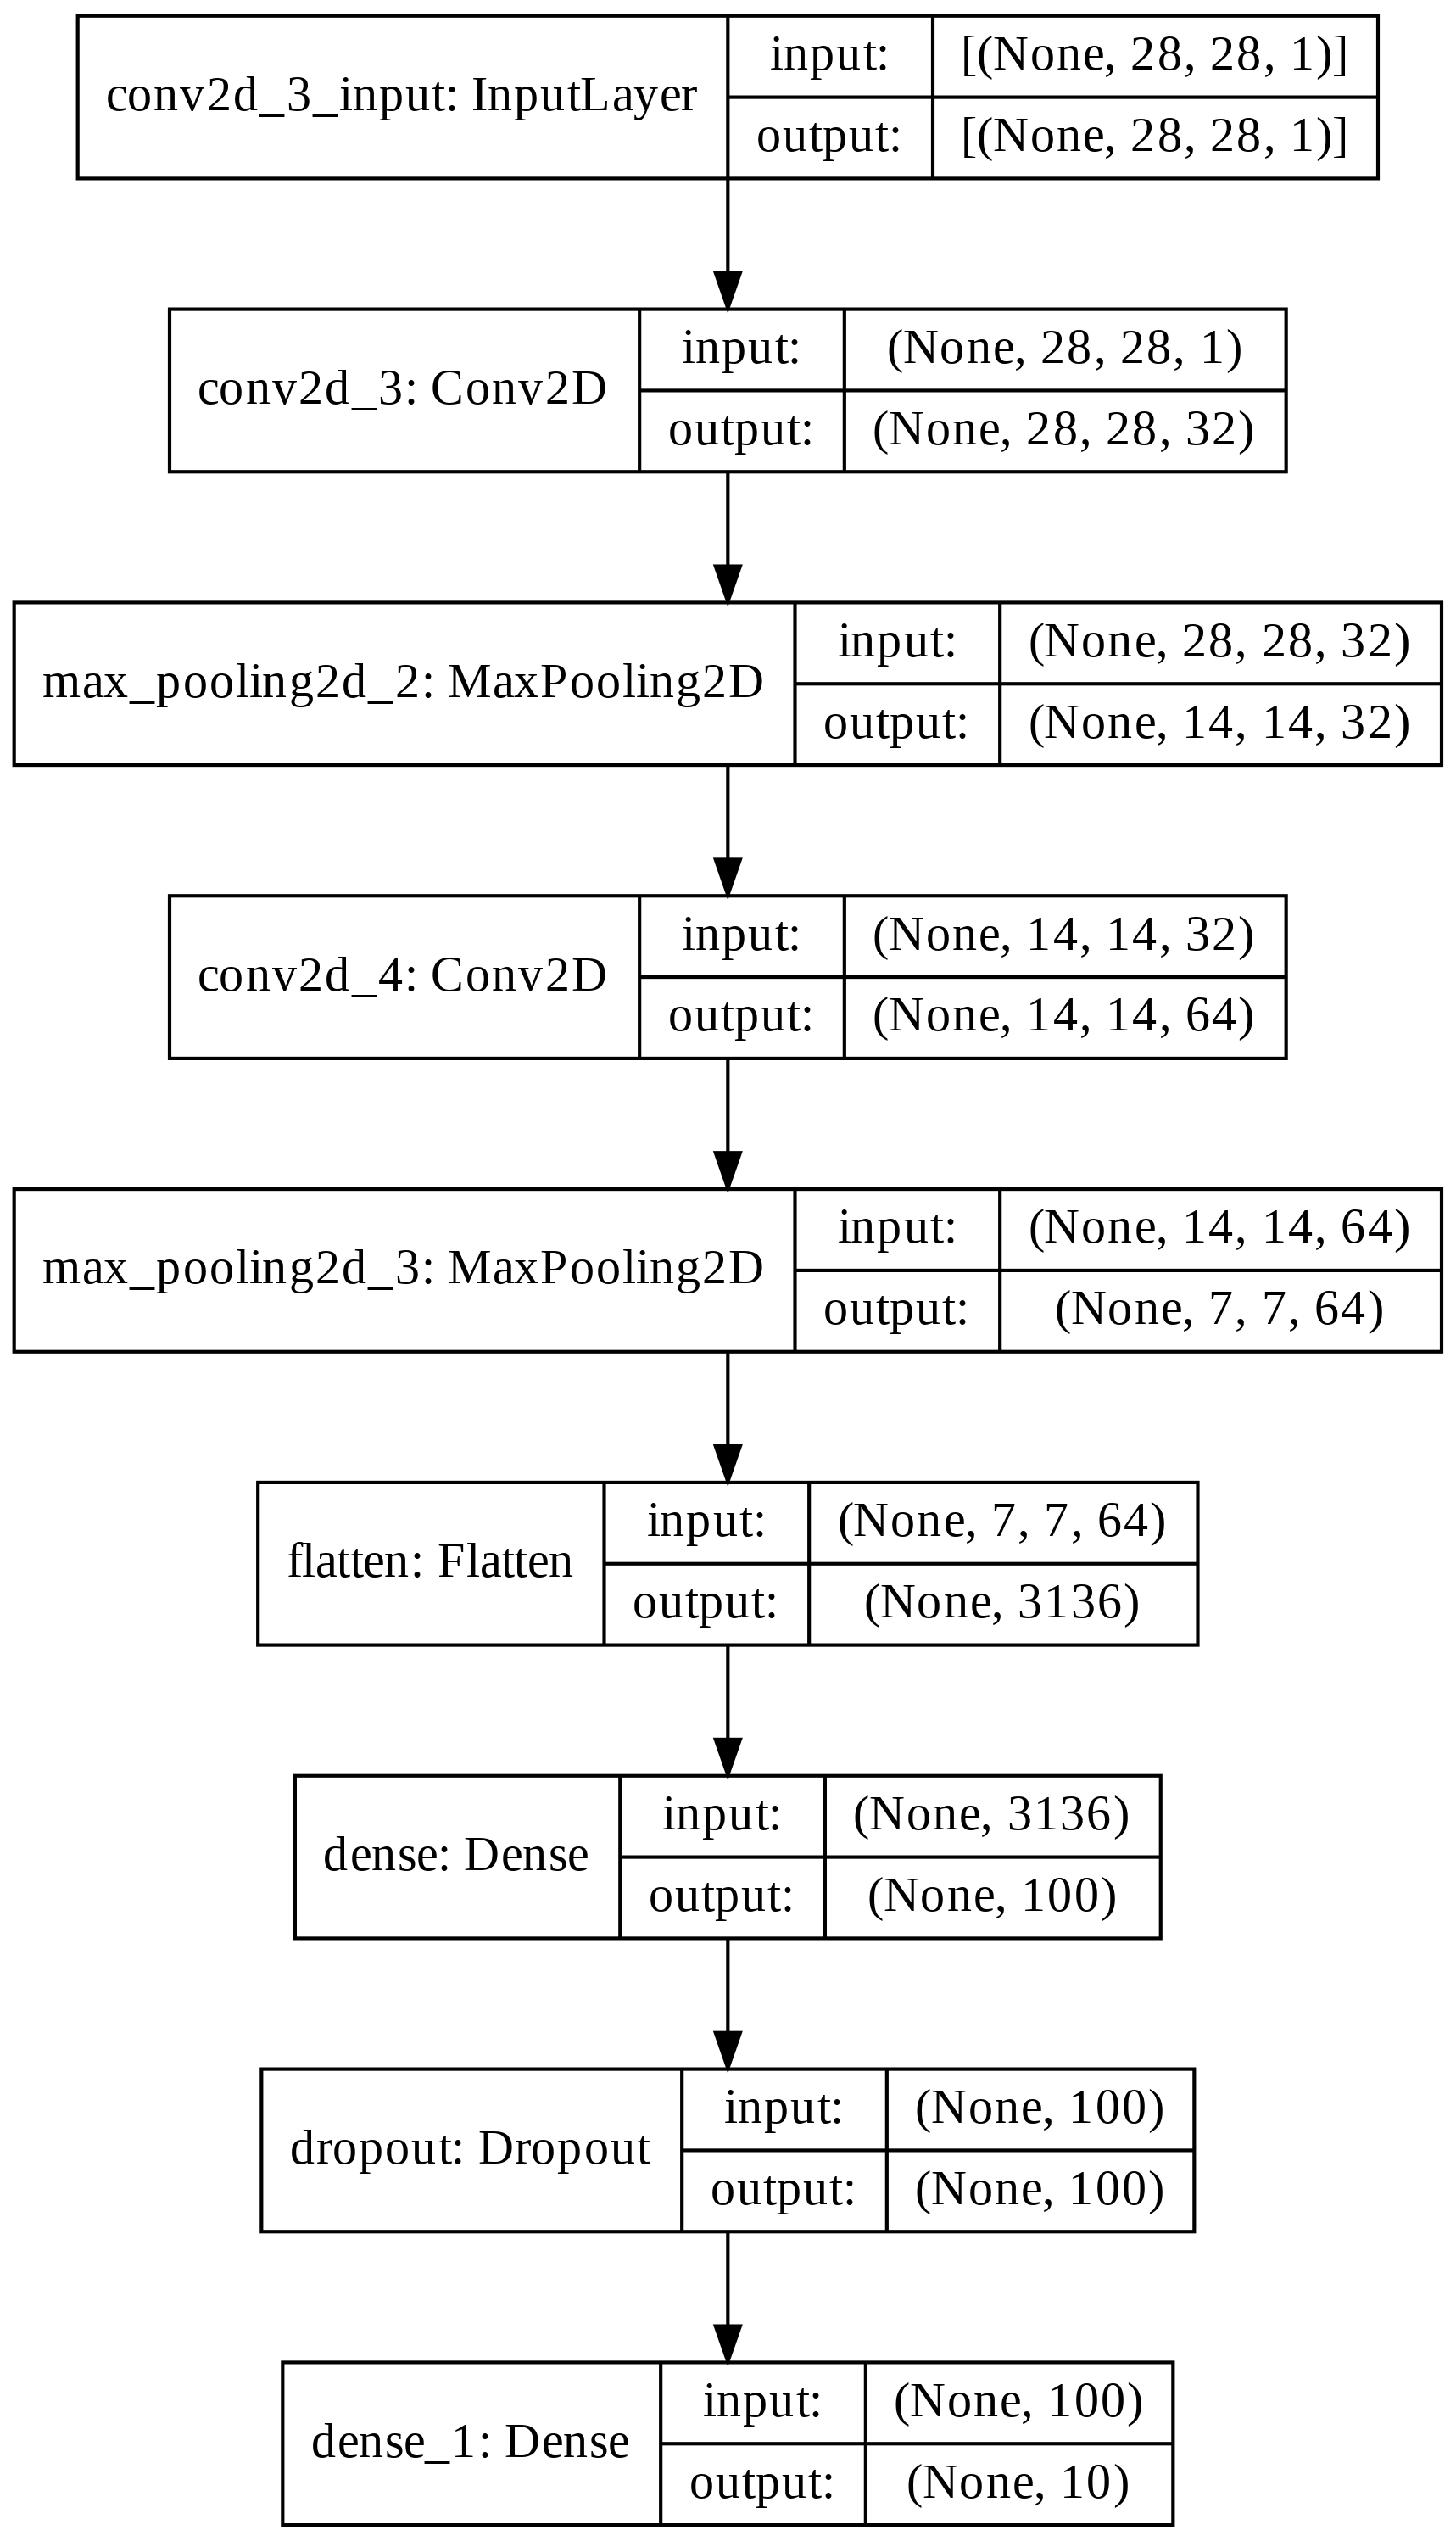

In [22]:
keras.utils.plot_model(model, show_shapes =True, to_file = 'cnn-architecture.png',dpi = 300)

In [23]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [24]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

In [26]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

In [27]:
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.5237 - accuracy: 0.8132 - val_loss: 0.3411 - val_accuracy: 0.8739
Epoch 2/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3542 - accuracy: 0.8732 - val_loss: 0.2841 - val_accuracy: 0.8940
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3029 - accuracy: 0.8900 - val_loss: 0.2511 - val_accuracy: 0.9074
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2722 - accuracy: 0.9015 - val_loss: 0.2438 - val_accuracy: 0.9112
Epoch 5/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2474 - accuracy: 0.9100 - val_loss: 0.2393 - val_accuracy: 0.9137
Epoch 6/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2262 - accuracy: 0.9165 - val_loss: 0.2433 - val_accuracy: 0.9119
Epoch 7/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2091 - accuracy: 0.9227 - val_loss: 0.2292 -

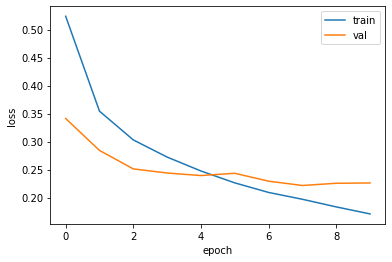

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [29]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 12ms/step - loss: 0.2215 - accuracy: 0.9206


[0.22152671217918396, 0.9205833077430725]

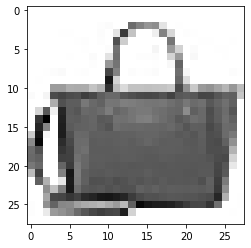

In [31]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')

In [32]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.1483828e-16 3.0824163e-29 1.5566688e-20 1.8371092e-21 6.7565012e-19
  1.9661649e-18 3.8384051e-18 1.0565393e-18 1.0000000e+00 1.0048189e-21]]


Text(0, 0.5, 'prob.')

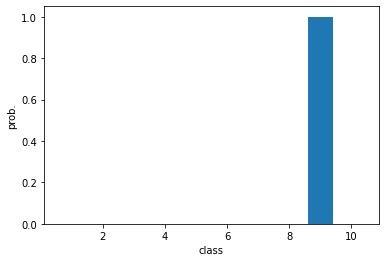

In [33]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')

In [34]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [36]:
test_scaled = test_input.reshape(-1,28,28,1) / 255
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2406 - accuracy: 0.9123


[0.24064375460147858, 0.9122999906539917]